In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!sudo apt-get update
!sudo apt-get install locales
!sudo locale-gen en_US.UTF-8
!sudo update-locale LANG=en_US.UTF-8
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [908 kB]
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,552 kB]
Get:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:13 http://archive.ubuntu.com/ubuntu jammy-backports InReleas

'en_US.UTF-8'

In [3]:
!pip install 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-miw__gkz
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-miw__gkz
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Created wheel for pycocotools: filename=pycocotools-2.0-cp310-cp310-linux_x86_64.whl size=375670 sha256=c50e62b8a5cba2df2e5e905b0789a50a64d23823613d1aacb646004509e98b3a
  Stored in directory: /tmp/pip-ephem-wheel-cache-ln5s1mw3/wheels/39/61/b4/480fbddb4d3d6bc34083e7397bc6f5d1381f79acc68e9f3511
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.8
    Uninstalling pycocotools-2.0.8:
      Successfully uninstalled pycocotools-2.0.8


In [4]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import random
pylab.rcParams['figure.figsize'] = (8.0, 10.0)# Import Libraries
# For visualization
import os
import seaborn as sns
from matplotlib import colors
from tensorboard.backend.event_processing import event_accumulator as ea
from PIL import Image

In [6]:
# I am visualizing some images in the 'train/' directory

dataDir='/content/drive/MyDrive/try/CAR/train'
dataType='COCO_train_annos'
mul_dataType='COCO_mul_train_annos'
annFile='{}/{}.json'.format(dataDir,dataType)
mul_annFile='{}/{}.json'.format(dataDir,mul_dataType)
img_dir = "/content/drive/MyDrive/try/CAR/img"

In [7]:
# initialize coco api for instance annotations
coco=COCO(annFile)
mul_coco=COCO(mul_annFile)

loading annotations into memory...
Done (t=1.32s)
creating index...
index created!
loading annotations into memory...
Done (t=0.30s)
creating index...
index created!


In [8]:
# display categories and supercategories

#Single Class #Damage dataset
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories for damages: \n{}\n'.format(', '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories for damages: \n{}\n'.format(', '.join(nms)))

#Multi Class #Parts dataset
mul_cats = mul_coco.loadCats(mul_coco.getCatIds())
mul_nms=[cat['name'] for cat in mul_cats]
print('COCO categories for parts: \n{}\n'.format(', '.join(mul_nms)))

mul_nms = set([mul_cat['supercategory'] for mul_cat in mul_cats])
print('COCO supercategories for parts: \n{}\n'.format(', '.join(mul_nms)))

COCO categories for damages: 
damage

COCO supercategories for damages: 
part

COCO categories for parts: 
headlamp, rear_bumper, door, hood, front_bumper

COCO supercategories for parts: 
part



In [9]:
# get all images containing 'damage' category, select one at random
catIds = coco.getCatIds(catNms=['supercategory']);
imgIds = coco.getImgIds(catIds=catIds );

In [10]:
random_img_id = random.choice(imgIds)
print("{} image id was selected at random from the {} list".format(random_img_id, imgIds))

25 image id was selected at random from the [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58] list


In [11]:
# Load the image
imgId = coco.getImgIds(imgIds = [random_img_id])
img = coco.loadImgs(imgId)[0]
print("Image details \n",img)

Image details 
 {'coco_url': '', 'date_captured': '2020-07-14 09:59:34.190485', 'file_name': '40.jpg', 'flickr_url': '', 'height': 1024, 'id': 25, 'license': 1, 'width': 1024}


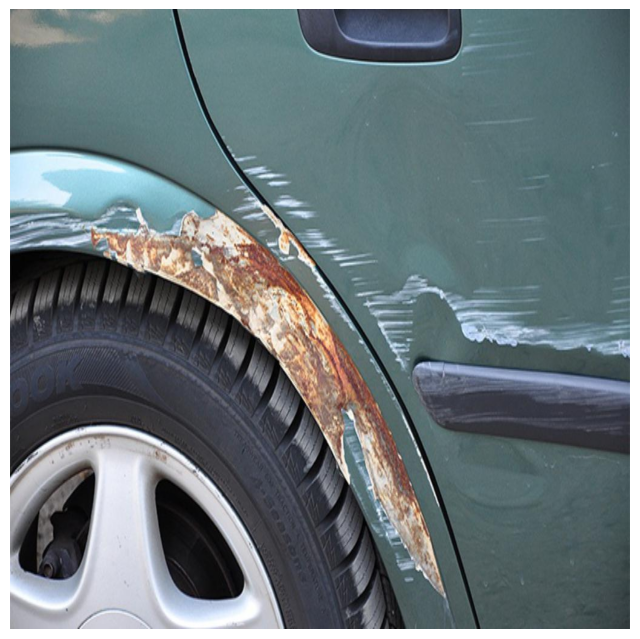

In [12]:
I = io.imread(img_dir + '/' + img['file_name'])
plt.axis('off')
plt.imshow(I)
plt.show()

In [13]:
#get damage annotations
annIds = coco.getAnnIds(imgIds=imgId,iscrowd=None)
anns = coco.loadAnns(annIds)

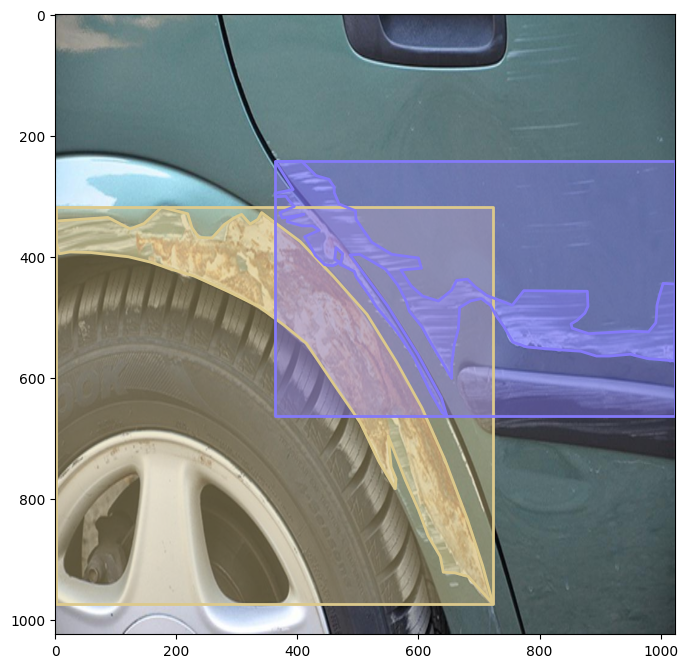

In [14]:
#Plot damages
plt.imshow(I)
plt.axis('on')
coco.showAnns(anns, draw_bbox=True )

In [15]:
#get parts annotations
mul_annIds = mul_coco.getAnnIds(imgIds=imgId,iscrowd=None)
mul_anns = mul_coco.loadAnns(mul_annIds)

In [16]:
# Create a dictionary between category_id and category name
category_map = dict()

for ele in list(mul_coco.cats.values()):
    category_map.update({ele['id']:ele['name']})

In [17]:
category_map

{1: 'headlamp', 2: 'rear_bumper', 3: 'door', 4: 'hood', 5: 'front_bumper'}

Parts are: ['door']


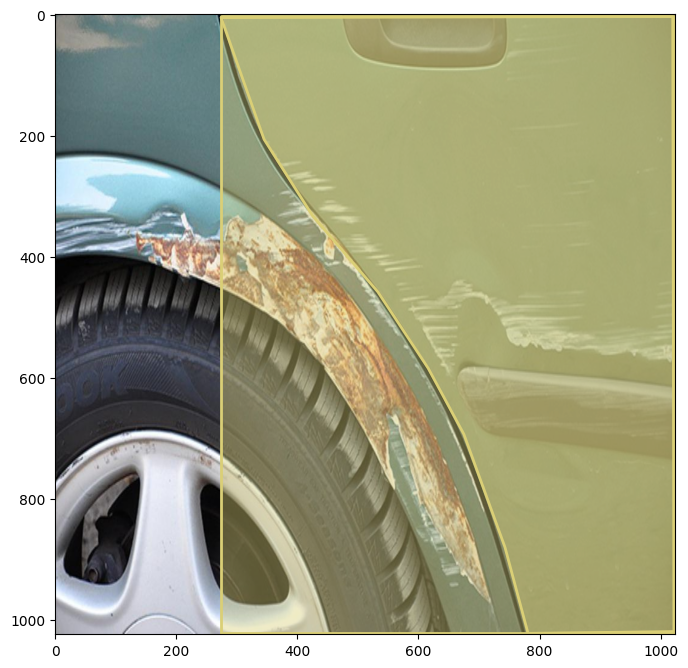

In [18]:
#Create a list of parts in the image
parts = []
for region in mul_anns:
    parts.append(category_map[region['category_id']])

print("Parts are:", parts)

#Plot Parts
I = io.imread(img_dir + '/' + img['file_name'])
plt.imshow(I)
plt.axis('on')
mul_coco.showAnns(mul_anns, draw_bbox=True )

In [19]:
!git clone https://github.com/facebookresearch/detectron2.git

Cloning into 'detectron2'...
remote: Enumerating objects: 15743, done.
remote: Total 15743 (delta 0), reused 0 (delta 0), pack-reused 15743
Receiving objects: 100% (15743/15743), 6.32 MiB | 10.08 MiB/s, done.
Resolving deltas: 100% (11492/11492), done.


In [20]:
%cd detectron2
!pip install -e .

/content/detectron2
Obtaining file:///content/detectron2
  Preparing metadata (setup.py) ... done
  Using cached pycocotools-2.0.8-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.1 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.2 MB/s eta 0:00:00
Using cached pycocotools-2.0.8-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (427 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 49.0 MB/s eta 0:00:00
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61398 sha256=2b40b20f469ffbdb20310a5fbc8765b337

In [21]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

2.3.1+cu121 True


In [22]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
import matplotlib.pyplot as plt
import skimage.io as io

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.engine import DefaultTrainer
from detectron2.utils.visualizer import ColorMode
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

# Set base params
plt.rcParams["figure.figsize"] = [16,9]

In [23]:
!python -m detectron2.utils.collect_env

-------------------------------  -----------------------------------------------------------------
sys.platform                     linux
Python                           3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]
numpy                            1.26.4
detectron2                       0.6 @/content/detectron2/detectron2
Compiler                         GCC 11.4
CUDA compiler                    CUDA 12.2
detectron2 arch flags            7.5
DETECTRON2_ENV_MODULE            <not set>
PyTorch                          2.3.1+cu121 @/usr/local/lib/python3.10/dist-packages/torch
PyTorch debug build              False
torch._C._GLIBCXX_USE_CXX11_ABI  False
GPU available                    Yes
GPU 0                            Tesla T4 (arch=7.5)
Driver version                   535.104.05
CUDA_HOME                        /usr/local/cuda
Pillow                           9.4.0
torchvision                      0.18.1+cu121 @/usr/local/lib/python3.10/dist-packages/torchvision
torchvision a

In [24]:
dataset_dir = "/content/drive/MyDrive/try/CAR"
img_dir = "img/"
train_dir = "train/"
val_dir = "val/"
test_dir = "test/"

In [25]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("car_dataset_train5", {}, os.path.join(dataset_dir,train_dir,"COCO_train_annos.json"), os.path.join(dataset_dir,img_dir))
register_coco_instances("car_dataset_val5", {}, os.path.join(dataset_dir,val_dir,"COCO_val_annos.json"), os.path.join(dataset_dir,img_dir))
register_coco_instances("car_dataset_test", {}, os.path.join(dataset_dir,test_dir,"COCO_val_annos.json"), os.path.join(dataset_dir,img_dir))

In [26]:
dataset_dicts = DatasetCatalog.get("car_dataset_train5")
metadata_dicts = MetadataCatalog.get("car_dataset_train5")

[08/05 00:38:16 d2.data.datasets.coco]: Loaded 59 images in COCO format from /content/drive/MyDrive/try/CAR/train/COCO_train_annos.json


In [27]:
class CocoTrainer(DefaultTrainer):
  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):

    if output_folder is None:
        os.makedirs("coco_eval", exist_ok=True)
        output_folder = "coco_eval"

    return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [28]:
# Check if CUDA is available
!nvidia-smi  # Check if NVIDIA drivers are installed and the GPU is visible

import torch
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("CUDA is available. Using GPU for training.")
else:
    device = torch.device("cpu")
    print("CUDA is not available. Using CPU for training.")

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"))  # Use a more powerful model
cfg.DATASETS.TRAIN = ("car_dataset_train5",)
cfg.DATASETS.TEST = ("car_dataset_val5",)
cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2  # Adjust the batch size
cfg.SOLVER.BASE_LR = 0.00025  # Adjust the learning rate
cfg.SOLVER.WARMUP_ITERS = 1000  # Increase warmup iterations
cfg.SOLVER.MAX_ITER = 2000  # Increase the number of iterations
cfg.SOLVER.STEPS = (1500, 2500)  # Adjust learning rate steps
cfg.SOLVER.GAMMA = 0.1  # Adjust learning rate decay
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2
cfg.MODEL.RETINANET.NUM_CLASSES = 2
cfg.TEST.EVAL_PERIOD = 100  # Increase evaluation frequency

# Set the device
cfg.MODEL.DEVICE = str(device)

# Clear logs
!rm -rf cfg.OUTPUT_DIR

import os
cfg.OUTPUT_DIR = "/kaggle/working/output"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

Mon Aug  5 00:38:48 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
model_final_a3ec72.pkl: 254MB [00:02, 98.0MB/s]                          
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[08/05 00:38:52 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.10/dist-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[08/05 00:39:07 d2.utils.events]:  eta: 0:16:30  iter: 19  total_loss: 2.329  loss_cls: 1.071  loss_box_reg: 0.3898  loss_mask: 0.6928  loss_rpn_cls: 0.2451  loss_rpn_loc: 0.02159    time: 0.4901  last_time: 0.4141  data_time: 0.0449  last_data_time: 0.0095   lr: 4.9953e-06  max_mem: 2416M
[08/05 00:39:19 d2.utils.events]:  eta: 0:15:57  iter: 39  total_loss: 2.327  loss_cls: 0.9835  loss_box_reg: 0.2845  loss_mask: 0.6921  loss_rpn_cls: 0.1124  loss_rpn_loc: 0.01955    time: 0.4811  last_time: 0.5065  data_time: 0.0110  last_data_time: 0.0077   lr: 9.9902e-06  max_mem: 2416M
[08/05 00:39:28 d2.utils.events]:  eta: 0:14:59  iter: 59  total_loss: 2.102  loss_cls: 0.8082  loss_box_reg: 0.3705  loss_mask: 0.6885  loss_rpn_cls: 0.2454  loss_rpn_loc: 0.02629    time: 0.4672  last_time: 0.4426  data_time: 0.0058  last_data_time: 0.0073   lr: 1.4985e-05  max_mem: 2418M
[08/05 00:39:38 d2.utils.events]:  eta: 0:15:12  iter: 79  total_loss: 1.867  loss_cls: 0.6564  loss_box_reg: 0.3192  loss_ma

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[08/05 00:39:58 d2.utils.events]:  eta: 0:14:57  iter: 119  total_loss: 1.87  loss_cls: 0.5143  loss_box_reg: 0.4845  loss_mask: 0.67  loss_rpn_cls: 0.1604  loss_rpn_loc: 0.02373    time: 0.4741  last_time: 0.4837  data_time: 0.0070  last_data_time: 0.0055   lr: 2.997e-05  max_mem: 2418M
[08/05 00:40:08 d2.utils.events]:  eta: 0:14:56  iter: 139  total_loss: 1.594  loss_cls: 0.4296  loss_box_reg: 0.4564  loss_mask: 0.6588  loss_rpn_cls: 0.107  loss_rpn_loc: 0.01965    time: 0.4773  last_time: 0.4959  data_time: 0.0087  last_data_time: 0.0060   lr: 3.4965e-05  max_mem: 2418M
[08/05 00:40:18 d2.utils.events]:  eta: 0:15:01  iter: 159  total_loss: 1.587  loss_cls: 0.4238  loss_box_reg: 0.4541  loss_mask: 0.6498  loss_rpn_cls: 0.0529  loss_rpn_loc: 0.01179    time: 0.4802  last_time: 0.4710  data_time: 0.0060  last_data_time: 0.0051   lr: 3.996e-05  max_mem: 2418M
[08/05 00:40:28 d2.utils.events]:  eta: 0:14:52  iter: 179  total_loss: 1.529  loss_cls: 0.3924  loss_box_reg: 0.4352  loss_mas

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[08/05 00:40:48 d2.utils.events]:  eta: 0:14:32  iter: 219  total_loss: 1.554  loss_cls: 0.3851  loss_box_reg: 0.4557  loss_mask: 0.6102  loss_rpn_cls: 0.05904  loss_rpn_loc: 0.0174    time: 0.4864  last_time: 0.5450  data_time: 0.0062  last_data_time: 0.0112   lr: 5.4945e-05  max_mem: 2418M
[08/05 00:40:58 d2.utils.events]:  eta: 0:14:25  iter: 239  total_loss: 1.593  loss_cls: 0.3781  loss_box_reg: 0.5469  loss_mask: 0.5743  loss_rpn_cls: 0.05226  loss_rpn_loc: 0.01785    time: 0.4883  last_time: 0.4962  data_time: 0.0091  last_data_time: 0.0061   lr: 5.994e-05  max_mem: 2418M
[08/05 00:41:08 d2.utils.events]:  eta: 0:14:16  iter: 259  total_loss: 1.536  loss_cls: 0.3677  loss_box_reg: 0.5025  loss_mask: 0.5815  loss_rpn_cls: 0.06585  loss_rpn_loc: 0.01526    time: 0.4888  last_time: 0.5698  data_time: 0.0068  last_data_time: 0.0079   lr: 6.4935e-05  max_mem: 2418M
[08/05 00:41:18 d2.utils.events]:  eta: 0:14:05  iter: 279  total_loss: 1.506  loss_cls: 0.3747  loss_box_reg: 0.5099  l

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[08/05 00:41:38 d2.utils.events]:  eta: 0:13:48  iter: 319  total_loss: 1.456  loss_cls: 0.3469  loss_box_reg: 0.5117  loss_mask: 0.5019  loss_rpn_cls: 0.05546  loss_rpn_loc: 0.01721    time: 0.4916  last_time: 0.5597  data_time: 0.0063  last_data_time: 0.0061   lr: 7.992e-05  max_mem: 2418M
[08/05 00:41:48 d2.utils.events]:  eta: 0:13:37  iter: 339  total_loss: 1.419  loss_cls: 0.3322  loss_box_reg: 0.4811  loss_mask: 0.5171  loss_rpn_cls: 0.0469  loss_rpn_loc: 0.01828    time: 0.4922  last_time: 0.4451  data_time: 0.0083  last_data_time: 0.0058   lr: 8.4915e-05  max_mem: 2418M
[08/05 00:41:58 d2.utils.events]:  eta: 0:13:28  iter: 359  total_loss: 1.531  loss_cls: 0.3363  loss_box_reg: 0.5892  loss_mask: 0.4432  loss_rpn_cls: 0.04794  loss_rpn_loc: 0.01463    time: 0.4931  last_time: 0.5650  data_time: 0.0080  last_data_time: 0.0079   lr: 8.991e-05  max_mem: 2418M
[08/05 00:42:08 d2.utils.events]:  eta: 0:13:18  iter: 379  total_loss: 1.384  loss_cls: 0.3216  loss_box_reg: 0.5652  lo

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[08/05 00:42:28 d2.utils.events]:  eta: 0:12:58  iter: 419  total_loss: 1.193  loss_cls: 0.2702  loss_box_reg: 0.4984  loss_mask: 0.399  loss_rpn_cls: 0.0309  loss_rpn_loc: 0.009354    time: 0.4936  last_time: 0.4949  data_time: 0.0087  last_data_time: 0.0326   lr: 0.0001049  max_mem: 2418M
[08/05 00:42:38 d2.utils.events]:  eta: 0:12:48  iter: 439  total_loss: 1.368  loss_cls: 0.2882  loss_box_reg: 0.566  loss_mask: 0.4009  loss_rpn_cls: 0.0277  loss_rpn_loc: 0.01353    time: 0.4939  last_time: 0.4197  data_time: 0.0080  last_data_time: 0.0055   lr: 0.00010989  max_mem: 2418M
[08/05 00:42:48 d2.utils.events]:  eta: 0:12:39  iter: 459  total_loss: 1.209  loss_cls: 0.2607  loss_box_reg: 0.5006  loss_mask: 0.3632  loss_rpn_cls: 0.03029  loss_rpn_loc: 0.01277    time: 0.4946  last_time: 0.5540  data_time: 0.0115  last_data_time: 0.0056   lr: 0.00011489  max_mem: 2418M
[08/05 00:42:58 d2.utils.events]:  eta: 0:12:29  iter: 479  total_loss: 1.417  loss_cls: 0.3141  loss_box_reg: 0.5968  los

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[08/05 00:43:18 d2.utils.events]:  eta: 0:12:10  iter: 519  total_loss: 1.221  loss_cls: 0.2566  loss_box_reg: 0.5842  loss_mask: 0.3186  loss_rpn_cls: 0.03206  loss_rpn_loc: 0.01801    time: 0.4946  last_time: 0.5018  data_time: 0.0107  last_data_time: 0.0162   lr: 0.00012987  max_mem: 2418M
[08/05 00:43:28 d2.utils.events]:  eta: 0:12:00  iter: 539  total_loss: 0.9934  loss_cls: 0.1934  loss_box_reg: 0.4483  loss_mask: 0.3122  loss_rpn_cls: 0.02097  loss_rpn_loc: 0.007432    time: 0.4946  last_time: 0.5382  data_time: 0.0064  last_data_time: 0.0055   lr: 0.00013487  max_mem: 2418M
[08/05 00:43:38 d2.utils.events]:  eta: 0:11:51  iter: 559  total_loss: 0.9527  loss_cls: 0.1854  loss_box_reg: 0.4563  loss_mask: 0.3027  loss_rpn_cls: 0.01826  loss_rpn_loc: 0.01357    time: 0.4951  last_time: 0.5571  data_time: 0.0084  last_data_time: 0.0071   lr: 0.00013986  max_mem: 2418M
[08/05 00:43:48 d2.utils.events]:  eta: 0:11:40  iter: 579  total_loss: 0.8948  loss_cls: 0.173  loss_box_reg: 0.40

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[08/05 00:44:09 d2.utils.events]:  eta: 0:11:22  iter: 619  total_loss: 0.913  loss_cls: 0.1882  loss_box_reg: 0.392  loss_mask: 0.302  loss_rpn_cls: 0.015  loss_rpn_loc: 0.01162    time: 0.4962  last_time: 0.3841  data_time: 0.0151  last_data_time: 0.0055   lr: 0.00015485  max_mem: 2418M
[08/05 00:44:18 d2.utils.events]:  eta: 0:11:12  iter: 639  total_loss: 0.7417  loss_cls: 0.1465  loss_box_reg: 0.3362  loss_mask: 0.2399  loss_rpn_cls: 0.01569  loss_rpn_loc: 0.01211    time: 0.4958  last_time: 0.4587  data_time: 0.0064  last_data_time: 0.0062   lr: 0.00015984  max_mem: 2418M
[08/05 00:44:28 d2.utils.events]:  eta: 0:11:02  iter: 659  total_loss: 0.7733  loss_cls: 0.1521  loss_box_reg: 0.324  loss_mask: 0.2663  loss_rpn_cls: 0.01229  loss_rpn_loc: 0.01123    time: 0.4958  last_time: 0.4399  data_time: 0.0114  last_data_time: 0.0064   lr: 0.00016484  max_mem: 2418M
[08/05 00:44:39 d2.utils.events]:  eta: 0:10:52  iter: 679  total_loss: 0.7256  loss_cls: 0.1294  loss_box_reg: 0.3501  l

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[08/05 00:44:59 d2.utils.events]:  eta: 0:10:33  iter: 719  total_loss: 0.6474  loss_cls: 0.1346  loss_box_reg: 0.2814  loss_mask: 0.2411  loss_rpn_cls: 0.01011  loss_rpn_loc: 0.006793    time: 0.4971  last_time: 0.4766  data_time: 0.0096  last_data_time: 0.0066   lr: 0.00017982  max_mem: 2418M
[08/05 00:45:09 d2.utils.events]:  eta: 0:10:23  iter: 739  total_loss: 0.6974  loss_cls: 0.1108  loss_box_reg: 0.303  loss_mask: 0.2572  loss_rpn_cls: 0.009201  loss_rpn_loc: 0.006441    time: 0.4970  last_time: 0.4572  data_time: 0.0077  last_data_time: 0.0134   lr: 0.00018482  max_mem: 2418M
[08/05 00:45:19 d2.utils.events]:  eta: 0:10:13  iter: 759  total_loss: 0.5562  loss_cls: 0.08937  loss_box_reg: 0.2553  loss_mask: 0.2025  loss_rpn_cls: 0.005368  loss_rpn_loc: 0.00952    time: 0.4971  last_time: 0.5637  data_time: 0.0090  last_data_time: 0.0057   lr: 0.00018981  max_mem: 2418M
[08/05 00:45:30 d2.utils.events]:  eta: 0:10:04  iter: 779  total_loss: 0.6053  loss_cls: 0.1096  loss_box_reg:

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[08/05 00:45:50 d2.utils.events]:  eta: 0:09:45  iter: 819  total_loss: 0.5692  loss_cls: 0.08887  loss_box_reg: 0.2404  loss_mask: 0.2209  loss_rpn_cls: 0.00633  loss_rpn_loc: 0.008467    time: 0.4984  last_time: 0.5033  data_time: 0.0119  last_data_time: 0.0053   lr: 0.0002048  max_mem: 2418M
[08/05 00:46:00 d2.utils.events]:  eta: 0:09:36  iter: 839  total_loss: 0.6218  loss_cls: 0.1002  loss_box_reg: 0.3006  loss_mask: 0.2098  loss_rpn_cls: 0.008891  loss_rpn_loc: 0.01129    time: 0.4989  last_time: 0.5376  data_time: 0.0166  last_data_time: 0.0285   lr: 0.00020979  max_mem: 2418M
[08/05 00:46:10 d2.utils.events]:  eta: 0:09:26  iter: 859  total_loss: 0.4996  loss_cls: 0.0732  loss_box_reg: 0.2156  loss_mask: 0.1806  loss_rpn_cls: 0.003158  loss_rpn_loc: 0.006795    time: 0.4988  last_time: 0.4801  data_time: 0.0067  last_data_time: 0.0055   lr: 0.00021479  max_mem: 2418M
[08/05 00:46:20 d2.utils.events]:  eta: 0:09:16  iter: 879  total_loss: 0.52  loss_cls: 0.07945  loss_box_reg: 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[08/05 00:46:41 d2.utils.events]:  eta: 0:08:56  iter: 919  total_loss: 0.4411  loss_cls: 0.07483  loss_box_reg: 0.1906  loss_mask: 0.1702  loss_rpn_cls: 0.006158  loss_rpn_loc: 0.006095    time: 0.4993  last_time: 0.4416  data_time: 0.0098  last_data_time: 0.0055   lr: 0.00022977  max_mem: 2418M
[08/05 00:46:50 d2.utils.events]:  eta: 0:08:46  iter: 939  total_loss: 0.5289  loss_cls: 0.07476  loss_box_reg: 0.2372  loss_mask: 0.1905  loss_rpn_cls: 0.002272  loss_rpn_loc: 0.005329    time: 0.4988  last_time: 0.3862  data_time: 0.0104  last_data_time: 0.0054   lr: 0.00023477  max_mem: 2418M
[08/05 00:47:00 d2.utils.events]:  eta: 0:08:36  iter: 959  total_loss: 0.4567  loss_cls: 0.04845  loss_box_reg: 0.183  loss_mask: 0.1732  loss_rpn_cls: 0.001717  loss_rpn_loc: 0.005252    time: 0.4989  last_time: 0.5695  data_time: 0.0058  last_data_time: 0.0063   lr: 0.00023976  max_mem: 2418M
[08/05 00:47:10 d2.utils.events]:  eta: 0:08:26  iter: 979  total_loss: 0.5063  loss_cls: 0.07707  loss_box

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[08/05 00:47:30 d2.utils.events]:  eta: 0:08:06  iter: 1019  total_loss: 0.5298  loss_cls: 0.08595  loss_box_reg: 0.2355  loss_mask: 0.1872  loss_rpn_cls: 0.004052  loss_rpn_loc: 0.00716    time: 0.4988  last_time: 0.4781  data_time: 0.0069  last_data_time: 0.0060   lr: 0.00025  max_mem: 2418M
[08/05 00:47:40 d2.utils.events]:  eta: 0:07:56  iter: 1039  total_loss: 0.4862  loss_cls: 0.05169  loss_box_reg: 0.1974  loss_mask: 0.1867  loss_rpn_cls: 0.001271  loss_rpn_loc: 0.005003    time: 0.4990  last_time: 0.4990  data_time: 0.0115  last_data_time: 0.0069   lr: 0.00025  max_mem: 2418M
[08/05 00:47:50 d2.utils.events]:  eta: 0:07:46  iter: 1059  total_loss: 0.4569  loss_cls: 0.07687  loss_box_reg: 0.2007  loss_mask: 0.189  loss_rpn_cls: 0.001622  loss_rpn_loc: 0.007014    time: 0.4988  last_time: 0.5676  data_time: 0.0060  last_data_time: 0.0051   lr: 0.00025  max_mem: 2418M
[08/05 00:48:00 d2.utils.events]:  eta: 0:07:37  iter: 1079  total_loss: 0.3769  loss_cls: 0.04406  loss_box_reg: 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[08/05 00:48:21 d2.utils.events]:  eta: 0:07:18  iter: 1119  total_loss: 0.4282  loss_cls: 0.05963  loss_box_reg: 0.1952  loss_mask: 0.1504  loss_rpn_cls: 0.001002  loss_rpn_loc: 0.005461    time: 0.4991  last_time: 0.5559  data_time: 0.0057  last_data_time: 0.0055   lr: 0.00025  max_mem: 2418M
[08/05 00:48:31 d2.utils.events]:  eta: 0:07:08  iter: 1139  total_loss: 0.391  loss_cls: 0.04957  loss_box_reg: 0.1648  loss_mask: 0.1569  loss_rpn_cls: 0.001383  loss_rpn_loc: 0.004218    time: 0.4995  last_time: 0.5568  data_time: 0.0100  last_data_time: 0.0061   lr: 0.00025  max_mem: 2418M
[08/05 00:48:41 d2.utils.events]:  eta: 0:06:58  iter: 1159  total_loss: 0.4011  loss_cls: 0.06174  loss_box_reg: 0.1942  loss_mask: 0.1525  loss_rpn_cls: 0.001013  loss_rpn_loc: 0.006154    time: 0.4998  last_time: 0.5522  data_time: 0.0103  last_data_time: 0.0073   lr: 0.00025  max_mem: 2418M
[08/05 00:48:51 d2.utils.events]:  eta: 0:06:48  iter: 1179  total_loss: 0.3749  loss_cls: 0.05176  loss_box_reg:

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[08/05 00:49:12 d2.utils.events]:  eta: 0:06:28  iter: 1219  total_loss: 0.3662  loss_cls: 0.04127  loss_box_reg: 0.1557  loss_mask: 0.1332  loss_rpn_cls: 0.001812  loss_rpn_loc: 0.004585    time: 0.5002  last_time: 0.5352  data_time: 0.0105  last_data_time: 0.0192   lr: 0.00025  max_mem: 2418M
[08/05 00:49:22 d2.utils.events]:  eta: 0:06:18  iter: 1239  total_loss: 0.4156  loss_cls: 0.04579  loss_box_reg: 0.1754  loss_mask: 0.1591  loss_rpn_cls: 0.0006779  loss_rpn_loc: 0.004709    time: 0.5002  last_time: 0.4352  data_time: 0.0068  last_data_time: 0.0060   lr: 0.00025  max_mem: 2418M
[08/05 00:49:32 d2.utils.events]:  eta: 0:06:08  iter: 1259  total_loss: 0.3625  loss_cls: 0.04661  loss_box_reg: 0.1653  loss_mask: 0.1404  loss_rpn_cls: 0.001693  loss_rpn_loc: 0.004545    time: 0.5006  last_time: 0.4872  data_time: 0.0116  last_data_time: 0.0051   lr: 0.00025  max_mem: 2418M
[08/05 00:49:42 d2.utils.events]:  eta: 0:05:58  iter: 1279  total_loss: 0.3733  loss_cls: 0.0551  loss_box_reg

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[08/05 00:50:03 d2.utils.events]:  eta: 0:05:38  iter: 1319  total_loss: 0.3193  loss_cls: 0.04199  loss_box_reg: 0.1519  loss_mask: 0.1212  loss_rpn_cls: 0.001321  loss_rpn_loc: 0.005815    time: 0.5007  last_time: 0.4948  data_time: 0.0127  last_data_time: 0.0052   lr: 0.00025  max_mem: 2418M
[08/05 00:50:12 d2.utils.events]:  eta: 0:05:28  iter: 1339  total_loss: 0.3368  loss_cls: 0.04218  loss_box_reg: 0.151  loss_mask: 0.1409  loss_rpn_cls: 0.0007379  loss_rpn_loc: 0.003845    time: 0.5005  last_time: 0.5793  data_time: 0.0066  last_data_time: 0.0199   lr: 0.00025  max_mem: 2418M
[08/05 00:50:23 d2.utils.events]:  eta: 0:05:18  iter: 1359  total_loss: 0.3299  loss_cls: 0.04141  loss_box_reg: 0.131  loss_mask: 0.1358  loss_rpn_cls: 0.0009158  loss_rpn_loc: 0.005463    time: 0.5007  last_time: 0.5504  data_time: 0.0151  last_data_time: 0.0052   lr: 0.00025  max_mem: 2418M
[08/05 00:50:33 d2.utils.events]:  eta: 0:05:09  iter: 1379  total_loss: 0.3496  loss_cls: 0.04652  loss_box_reg

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[08/05 00:50:54 d2.utils.events]:  eta: 0:04:49  iter: 1419  total_loss: 0.3166  loss_cls: 0.04495  loss_box_reg: 0.1473  loss_mask: 0.1472  loss_rpn_cls: 0.0004717  loss_rpn_loc: 0.005698    time: 0.5012  last_time: 0.4621  data_time: 0.0111  last_data_time: 0.0058   lr: 0.00025  max_mem: 2418M
[08/05 00:51:04 d2.utils.events]:  eta: 0:04:39  iter: 1439  total_loss: 0.3378  loss_cls: 0.04106  loss_box_reg: 0.1405  loss_mask: 0.1468  loss_rpn_cls: 0.0008041  loss_rpn_loc: 0.006733    time: 0.5012  last_time: 0.5047  data_time: 0.0080  last_data_time: 0.0156   lr: 0.00025  max_mem: 2418M
[08/05 00:51:14 d2.utils.events]:  eta: 0:04:29  iter: 1459  total_loss: 0.2934  loss_cls: 0.03553  loss_box_reg: 0.125  loss_mask: 0.1266  loss_rpn_cls: 0.0004716  loss_rpn_loc: 0.004642    time: 0.5012  last_time: 0.4828  data_time: 0.0080  last_data_time: 0.0062   lr: 0.00025  max_mem: 2418M
[08/05 00:51:24 d2.utils.events]:  eta: 0:04:19  iter: 1479  total_loss: 0.3603  loss_cls: 0.05512  loss_box_r

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[08/05 00:51:44 d2.utils.events]:  eta: 0:03:59  iter: 1519  total_loss: 0.3016  loss_cls: 0.03508  loss_box_reg: 0.1355  loss_mask: 0.1232  loss_rpn_cls: 0.0006044  loss_rpn_loc: 0.004318    time: 0.5011  last_time: 0.4495  data_time: 0.0080  last_data_time: 0.0058   lr: 2.5e-05  max_mem: 2418M
[08/05 00:51:54 d2.utils.events]:  eta: 0:03:49  iter: 1539  total_loss: 0.3941  loss_cls: 0.05798  loss_box_reg: 0.1454  loss_mask: 0.1591  loss_rpn_cls: 0.001206  loss_rpn_loc: 0.007047    time: 0.5013  last_time: 0.5930  data_time: 0.0099  last_data_time: 0.0082   lr: 2.5e-05  max_mem: 2418M
[08/05 00:52:04 d2.utils.events]:  eta: 0:03:39  iter: 1559  total_loss: 0.3492  loss_cls: 0.0467  loss_box_reg: 0.1371  loss_mask: 0.1469  loss_rpn_cls: 0.0006566  loss_rpn_loc: 0.004201    time: 0.5013  last_time: 0.4897  data_time: 0.0064  last_data_time: 0.0088   lr: 2.5e-05  max_mem: 2418M
[08/05 00:52:14 d2.utils.events]:  eta: 0:03:29  iter: 1579  total_loss: 0.301  loss_cls: 0.04382  loss_box_reg

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[08/05 00:52:35 d2.utils.events]:  eta: 0:03:09  iter: 1619  total_loss: 0.3056  loss_cls: 0.04009  loss_box_reg: 0.1256  loss_mask: 0.1385  loss_rpn_cls: 0.0008316  loss_rpn_loc: 0.005737    time: 0.5016  last_time: 0.4444  data_time: 0.0073  last_data_time: 0.0052   lr: 2.5e-05  max_mem: 2418M
[08/05 00:52:45 d2.utils.events]:  eta: 0:02:59  iter: 1639  total_loss: 0.2877  loss_cls: 0.03439  loss_box_reg: 0.1202  loss_mask: 0.1187  loss_rpn_cls: 0.0001977  loss_rpn_loc: 0.004652    time: 0.5018  last_time: 0.4852  data_time: 0.0095  last_data_time: 0.0114   lr: 2.5e-05  max_mem: 2418M
[08/05 00:52:55 d2.utils.events]:  eta: 0:02:50  iter: 1659  total_loss: 0.268  loss_cls: 0.03282  loss_box_reg: 0.1025  loss_mask: 0.1222  loss_rpn_cls: 0.0006301  loss_rpn_loc: 0.005104    time: 0.5020  last_time: 0.4739  data_time: 0.0081  last_data_time: 0.0068   lr: 2.5e-05  max_mem: 2418M
[08/05 00:53:05 d2.utils.events]:  eta: 0:02:40  iter: 1679  total_loss: 0.3222  loss_cls: 0.04184  loss_box_r

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[08/05 00:53:26 d2.utils.events]:  eta: 0:02:20  iter: 1719  total_loss: 0.268  loss_cls: 0.03079  loss_box_reg: 0.104  loss_mask: 0.1174  loss_rpn_cls: 0.0004743  loss_rpn_loc: 0.003665    time: 0.5021  last_time: 0.5917  data_time: 0.0060  last_data_time: 0.0058   lr: 2.5e-05  max_mem: 2418M
[08/05 00:53:36 d2.utils.events]:  eta: 0:02:10  iter: 1739  total_loss: 0.2493  loss_cls: 0.03177  loss_box_reg: 0.09719  loss_mask: 0.1157  loss_rpn_cls: 0.0002105  loss_rpn_loc: 0.004407    time: 0.5021  last_time: 0.4841  data_time: 0.0161  last_data_time: 0.0053   lr: 2.5e-05  max_mem: 2418M
[08/05 00:53:46 d2.utils.events]:  eta: 0:02:00  iter: 1759  total_loss: 0.2544  loss_cls: 0.03473  loss_box_reg: 0.1074  loss_mask: 0.1095  loss_rpn_cls: 0.0008337  loss_rpn_loc: 0.003501    time: 0.5023  last_time: 0.4736  data_time: 0.0097  last_data_time: 0.0267   lr: 2.5e-05  max_mem: 2418M
[08/05 00:53:56 d2.utils.events]:  eta: 0:01:49  iter: 1779  total_loss: 0.2512  loss_cls: 0.0332  loss_box_re

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[08/05 00:54:17 d2.utils.events]:  eta: 0:01:30  iter: 1819  total_loss: 0.2885  loss_cls: 0.03712  loss_box_reg: 0.1132  loss_mask: 0.1224  loss_rpn_cls: 0.0007775  loss_rpn_loc: 0.003695    time: 0.5024  last_time: 0.5984  data_time: 0.0110  last_data_time: 0.0278   lr: 2.5e-05  max_mem: 2418M
[08/05 00:54:26 d2.utils.events]:  eta: 0:01:19  iter: 1839  total_loss: 0.2689  loss_cls: 0.0344  loss_box_reg: 0.1028  loss_mask: 0.1106  loss_rpn_cls: 0.000993  loss_rpn_loc: 0.004783    time: 0.5022  last_time: 0.4869  data_time: 0.0076  last_data_time: 0.0056   lr: 2.5e-05  max_mem: 2418M
[08/05 00:54:37 d2.utils.events]:  eta: 0:01:09  iter: 1859  total_loss: 0.29  loss_cls: 0.03243  loss_box_reg: 0.1109  loss_mask: 0.1467  loss_rpn_cls: 0.0007008  loss_rpn_loc: 0.005191    time: 0.5023  last_time: 0.4435  data_time: 0.0096  last_data_time: 0.0053   lr: 2.5e-05  max_mem: 2418M
[08/05 00:54:46 d2.utils.events]:  eta: 0:00:59  iter: 1879  total_loss: 0.2592  loss_cls: 0.03571  loss_box_reg:

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[08/05 00:55:07 d2.utils.events]:  eta: 0:00:39  iter: 1919  total_loss: 0.265  loss_cls: 0.03415  loss_box_reg: 0.0979  loss_mask: 0.1167  loss_rpn_cls: 0.0004042  loss_rpn_loc: 0.004833    time: 0.5024  last_time: 0.5335  data_time: 0.0121  last_data_time: 0.0325   lr: 2.5e-05  max_mem: 2418M
[08/05 00:55:17 d2.utils.events]:  eta: 0:00:29  iter: 1939  total_loss: 0.3037  loss_cls: 0.04018  loss_box_reg: 0.1191  loss_mask: 0.1387  loss_rpn_cls: 0.0006832  loss_rpn_loc: 0.005445    time: 0.5024  last_time: 0.4471  data_time: 0.0058  last_data_time: 0.0057   lr: 2.5e-05  max_mem: 2418M
[08/05 00:55:27 d2.utils.events]:  eta: 0:00:19  iter: 1959  total_loss: 0.3155  loss_cls: 0.04092  loss_box_reg: 0.1354  loss_mask: 0.1437  loss_rpn_cls: 0.0004323  loss_rpn_loc: 0.007263    time: 0.5024  last_time: 0.5597  data_time: 0.0103  last_data_time: 0.0055   lr: 2.5e-05  max_mem: 2418M
[08/05 00:55:37 d2.utils.events]:  eta: 0:00:10  iter: 1979  total_loss: 0.2454  loss_cls: 0.02957  loss_box_r

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [29]:
evaluator = COCOEvaluator("car_dataset_val5", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "car_dataset_val5")
print(inference_on_dataset(trainer.model, val_loader, evaluator))

WARNING [08/05 00:56:41 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[08/05 00:56:41 d2.data.datasets.coco]: Loaded 11 images in COCO format from /content/drive/MyDrive/try/CAR/val/COCO_val_annos.json
[08/05 00:56:41 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[08/05 00:56:41 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[08/05 00:56:41 d2.data.common]: Serializing 11 elements to byte tensors and concatenating them all ...
[08/05 00:56:41 d2.data.common]: Serialized dataset takes 0.01 MiB
[08/05 00:56:41 d2.evaluation.evaluator]: Start inference on 11 batches


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[08/05 00:56:43 d2.evaluation.evaluator]: Inference done 11/11. Dataloading: 0.0014 s/iter. Inference: 0.1206 s/iter. Eval: 0.0270 s/iter. Total: 0.1491 s/iter. ETA=0:00:00


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[08/05 00:56:43 d2.evaluation.evaluator]: Total inference time: 0:00:01.047610 (0.174602 s / iter per device, on 1 devices)
[08/05 00:56:43 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.120645 s / iter per device, on 1 devices)
[08/05 00:56:43 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[08/05 00:56:43 d2.evaluation.coco_evaluation]: Saving results to ./output/coco_instances_results.json
[08/05 00:56:43 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[08/05 00:56:43 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[08/05 00:56:43 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[08/05 00:56:43 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[08/05 00:56:43 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.00 seconds.
 Average Precision  (AP)

In [32]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set a custom testing threshold for this model
cfg.DATASETS.TEST = ("car_dataset_val5", )
predictor = DefaultPredictor(cfg)

[08/05 00:58:08 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /kaggle/working/output/model_final.pth ...


In [33]:
val_dataset_dicts = DatasetCatalog.get("car_dataset_val5")
val_metadata_dicts = MetadataCatalog.get("car_dataset_val5")

[08/05 00:58:16 d2.data.datasets.coco]: Loaded 11 images in COCO format from /content/drive/MyDrive/try/CAR/val/COCO_val_annos.json


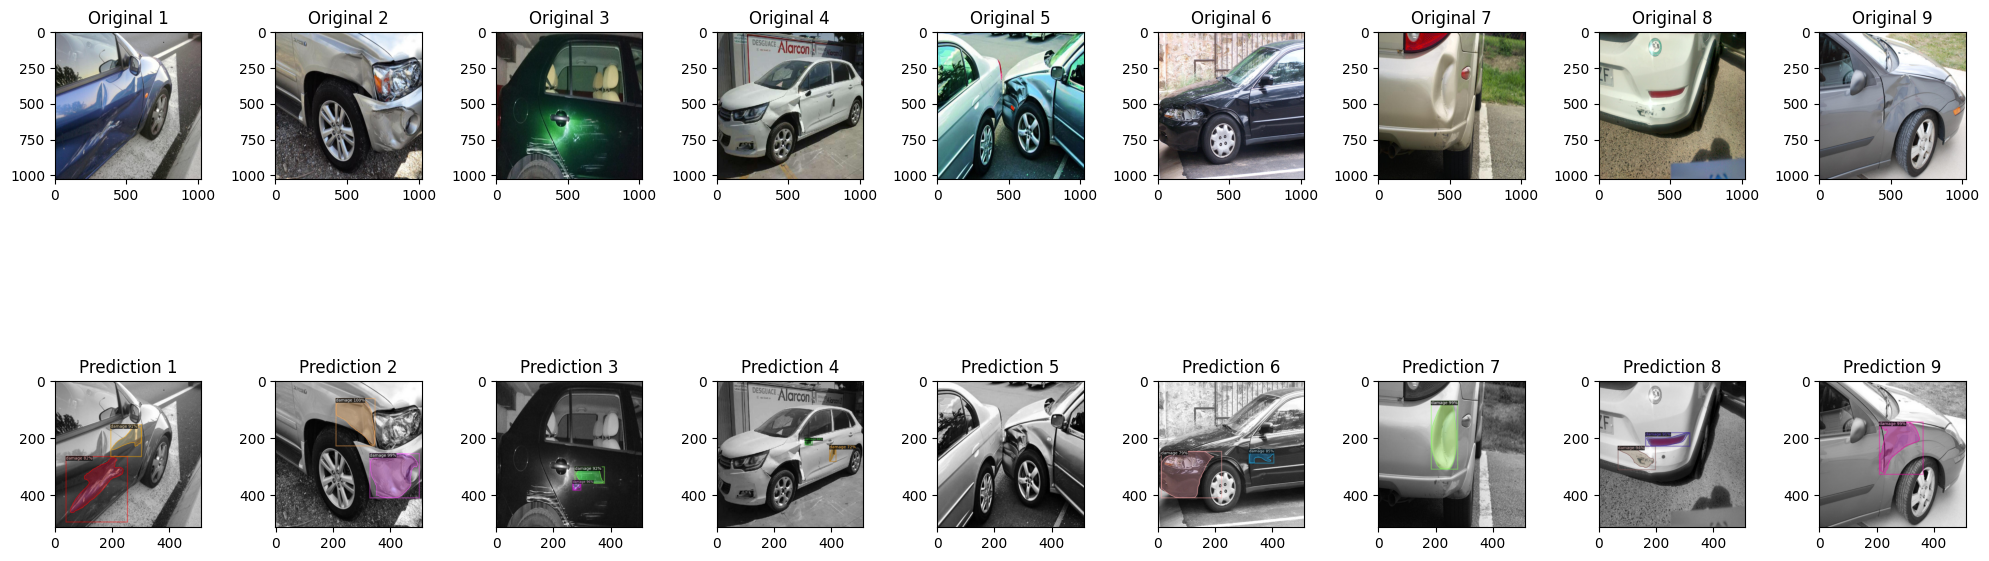

In [34]:
fig, ax = plt.subplots(2, 9, figsize =(20,8))  # Create a 2x5 grid for 10 images (5 original, 5 predictions)

# Indices for original images and predictions
original_indices = [ax[0][i] for i in range(9)]
prediction_indices = [ax[1][i] for i in range(9)]

for i, d in enumerate(random.sample(val_dataset_dicts, 9)):
    # Load the image
    im = io.imread(d["file_name"])

    # Get the predictions
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=val_metadata_dicts,
                   scale=0.5,
                   instance_mode=ColorMode.IMAGE_BW)  # Remove the colors of unsegmented pixels

    # Draw the predictions
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

    # Display the original image
    original_indices[i].grid(False)
    original_indices[i].imshow(im)
    original_indices[i].set_title(f'Original {i+1}')

    # Display the image with predictions
    prediction_indices[i].grid(False)
    prediction_indices[i].imshow(out.get_image()[:, :, ::-1])
    prediction_indices[i].set_title(f'Prediction {i+1}')

plt.tight_layout()
plt.show()

In [35]:
import torch
import cv2
import os
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load the configuration and the trained model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "/content/drive/MyDrive/try/model_final.pt")  # Replace with the path to your trained model
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Set the testing threshold for this model
cfg.MODEL.DEVICE = str(device)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2  # Number of classes (e.g., damaged and non-damaged cars)
predictor = DefaultPredictor(cfg)


Using device: cuda
[08/05 01:03:50 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/try/model_final.pt ...


In [41]:
def load_image(image_path):
    """Load an image from a file."""
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image from {image_path}")  # Print an error message
        return None  # Return None if image loading fails
    return image

def predict_and_visualize(image_path, predictor):
    """Predict defects and visualize the results."""
    image = load_image(image_path)
    if image is None:  # Handle the case where image loading fails
        return None
    outputs = predictor(image)
    v = Visualizer(image[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    return out.get_image()[:, :, ::-1]

# Directory containing the test images without annotations
test_images_dir = "/content/drive/MyDrive/try/CAR/test"
output_dir = "/content/drive/MyDrive/try/CAR/test/res"
os.makedirs(output_dir, exist_ok=True)

# Process each image and save the results
for image_file in os.listdir(test_images_dir):
    image_path = os.path.join(test_images_dir, image_file)
    result_image = predict_and_visualize(image_path, predictor)
    if result_image is not None:  # Only save if prediction was successful
        output_path = os.path.join(output_dir, image_file)
        cv2.imwrite(output_path, result_image)
        print(f"Saved result to {output_path}")

Saved result to /content/drive/MyDrive/try/CAR/test/res/45.jpg
Saved result to /content/drive/MyDrive/try/CAR/test/res/28.jpg
Saved result to /content/drive/MyDrive/try/CAR/test/res/11.jpg
Saved result to /content/drive/MyDrive/try/CAR/test/res/12.jpg
Saved result to /content/drive/MyDrive/try/CAR/test/res/60.jpg
Saved result to /content/drive/MyDrive/try/CAR/test/res/72.jpg
Saved result to /content/drive/MyDrive/try/CAR/test/res/67.jpg
Saved result to /content/drive/MyDrive/try/CAR/test/res/66.jpg
Saved result to /content/drive/MyDrive/try/CAR/test/res/Car damages 2.jpg
Saved result to /content/drive/MyDrive/try/CAR/test/res/Car damages 12.png
Saved result to /content/drive/MyDrive/try/CAR/test/res/Car damages 11.png
Saved result to /content/drive/MyDrive/try/CAR/test/res/Car damages 15.png
Saved result to /content/drive/MyDrive/try/CAR/test/res/Car damages 14.png
Saved result to /content/drive/MyDrive/try/CAR/test/res/Car damages 13.png
Saved result to /content/drive/MyDrive/try/CAR/

In [ ]:
torch.save(trainer.model.state_dict(), "/content/drive/MyDrive/try/model_final.pt")